In [2]:
import numpy as np
import glob
import menpo.io as mio
import matplotlib.pyplot as plt
import cv2

In [3]:
landmarks = sorted(glob.glob("frontalshapes_manuallyannotated_46points/*"))
faces = sorted(glob.glob("frontalimages_spatiallynormalized*/*"))
# for face, file in zip(faces,files):
    
#     print(face , file)
    
print(type(faces))
# faces = 200

<class 'list'>


In [4]:
len(faces)

400

frontalshapes_manuallyannotated_46points/100a.pts
[[159.686  105.447 ]
 [160.683  135.598 ]
 [204.476   77.5498]
 [186.722  105.089 ]
 [190.508  119.702 ]
 [187.499  136.291 ]
 [205.663  172.537 ]
 [220.91   135.26  ]
 [221.072  104.152 ]
 [104.643   48.8948]
 [ 94.3955  72.6546]
 [103.738   97.1924]
 [109.473   71.9728]
 [104.342  152.687 ]
 [ 94.2905 177.701 ]
 [105.282  203.153 ]
 [108.826  177.208 ]
 [102.835   30.3199]
 [145.453   27.0488]
 [185.731   33.5807]
 [221.349   45.09  ]
 [247.785   58.8706]
 [270.536   82.8855]
 [274.151  118.578 ]
 [264.663  164.211 ]
 [240.265  200.355 ]
 [206.831  219.783 ]
 [165.717  229.271 ]
 [124.151  236.5   ]
 [ 99.472  236.057 ]
 [ 83.4876  34.3393]
 [ 71.5991  56.7249]
 [ 75.731   99.898 ]
 [ 86.797  102.897 ]
 [ 86.6024 145.771 ]
 [ 74.8597 148.976 ]
 [ 71.1592 189.967 ]
 [ 80.3253 214.813 ]
 [107.667  108.521 ]
 [130.173  106.194 ]
 [142.08    94.5205]
 [167.399   93.2719]
 [168.258  150.533 ]
 [141.116  150.085 ]
 [130.609  139.477 ]
 [107

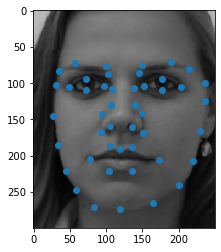

In [5]:
test = mio.import_landmark_file(landmarks[0])
print(landmarks[0])
img = cv2.imread(faces[0])
print(test['PTS'].points)

plt.imshow(img)
plt.scatter(test['PTS'].points[:,1], test['PTS'].points[:,0])
# menpo reads the coordinates as ZYX
# plt.gca().invert_yaxis()
plt.show()

# Scatter plot of the the landmark distribution together with the mean shape

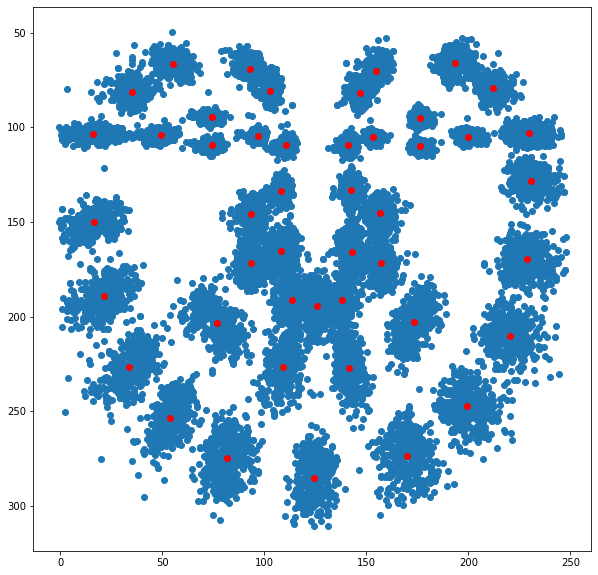

In [6]:
landmarkpoints = []
for points in landmarks:
    landmarkpoints.append(mio.import_landmark_file(points)['PTS'].points)
    
landmarkpoints = np.array(landmarkpoints)

x = landmarkpoints[:,:,1].reshape(-1)
y = landmarkpoints[:,:,0].reshape(-1)

mean = np.zeros([92])

for i in range(46):
    mean[i] = np.mean(landmarkpoints[:,i,1])
    mean[i+46] = np.mean(landmarkpoints[:,i,0])
    

# print(meany.shape)
# x.shape
# print(landmarkpoints[0])
# print(landmarkpoints[:,:,0])
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.scatter(mean[:46], mean[46:], color = 'r')
plt.gca().invert_yaxis()
plt.show()

# Histogram of eigenvalues as obtained from the SVD of the data covariance matrix

In [7]:
print(landmarkpoints.shape)
X = landmarkpoints.reshape(400,-1)
print(X.shape)

(400, 46, 2)
(400, 92)


In [8]:
# print(X.shape)
CovarMatrix = np.cov(X.T)
CovarMatrix.shape

(92, 92)

In [9]:
U,S,VT = np.linalg.svd(CovarMatrix)
eigval, eigenvec = np.linalg.eig(CovarMatrix)
# eigenval = np.vstack([np.arange(0,46,1), eigval])
# eigval
print(eigval.shape)
print(eigenvec.shape)

(92,)
(92, 92)


In [14]:
print(S.shape)
xlabel = np.arange(0,92, 1)
print("Using eig function:\n", eigval[:10])
print("\nUsing SVD function:\n",S.T[:10])

print(eigenvec[0])
print(U[0])

(92,)
Using eig function:
 [1167.9764863   382.55719475  318.43578404  160.3621351   154.87818493
  129.79082387  111.62111697   77.10411958   71.91281368   51.92322807]

Using SVD function:
 [1167.9764863   382.55719475  318.43578404  160.3621351   154.87818493
  129.79082387  111.62111697   77.10411958   71.91281368   51.92322807]
[-0.12910446 -0.1878904   0.00364015 -0.03813568 -0.00131311  0.02962545
  0.11663763 -0.00629787  0.18545887  0.17457389  0.05078735 -0.06524945
  0.01007832 -0.10712364  0.07143315 -0.06880342 -0.04449113  0.09938529
 -0.01153506  0.03443022 -0.08139168 -0.03595185 -0.08188837  0.00955762
 -0.02843378 -0.0040788  -0.05679552 -0.01633908  0.12402397  0.03661378
  0.0310904  -0.10523313 -0.0439118  -0.1145763  -0.08421625 -0.02057979
 -0.08762102 -0.06051531 -0.14911868  0.05849362  0.00952387  0.0272149
 -0.05392427  0.11254917  0.1109215  -0.02228509  0.15414452 -0.03330097
  0.18272019 -0.02607369  0.09911057 -0.07609595  0.04411658 -0.01991351
  0.11333

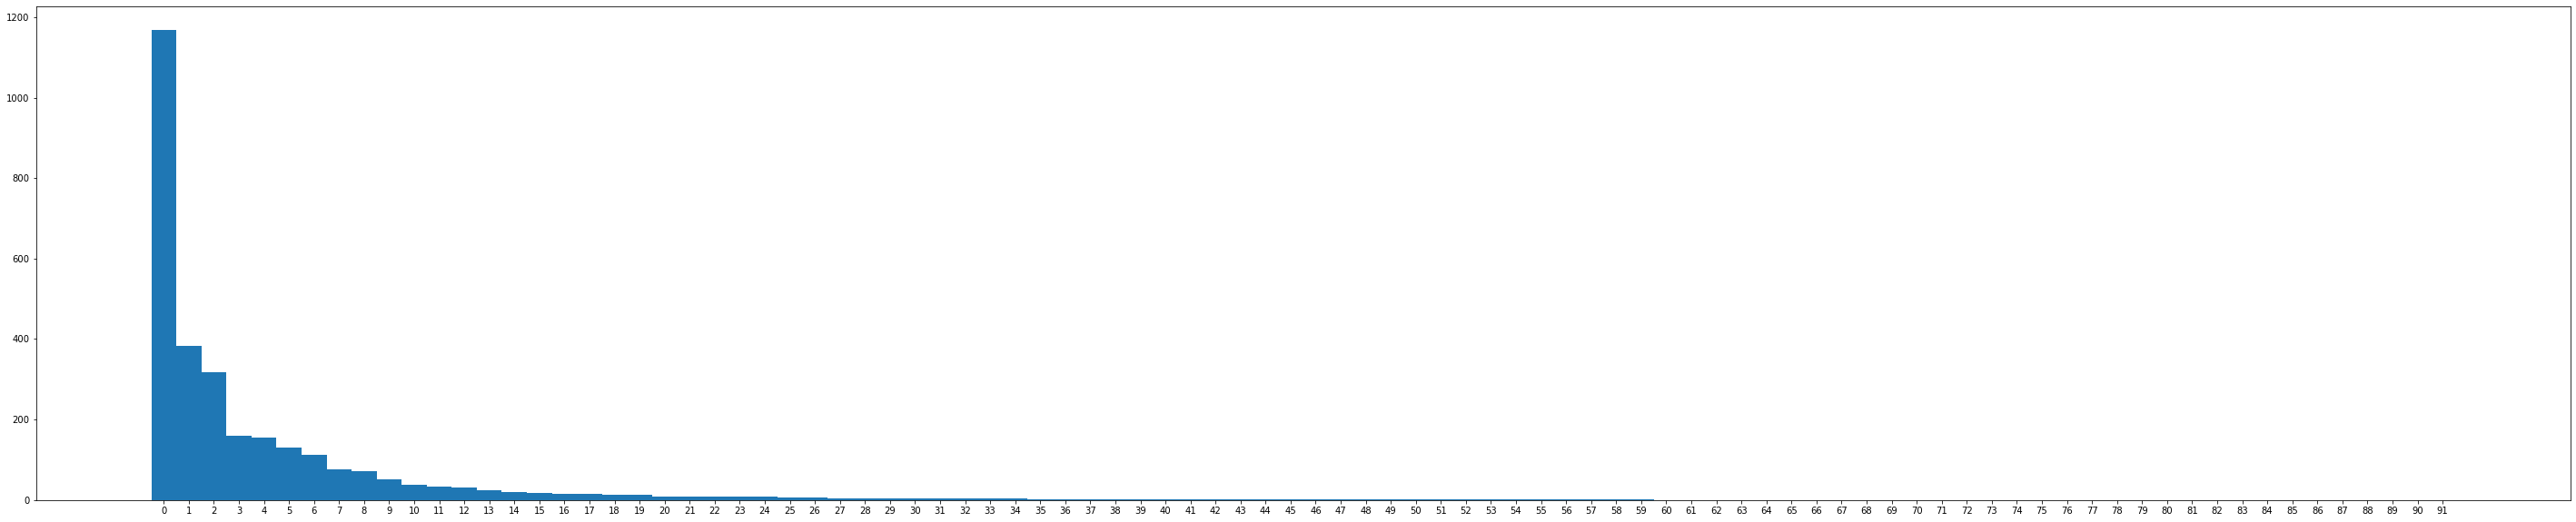

In [26]:
# ax = plt.axes()
plt.figure(figsize=(50,10))
# ax.set_xticks(pos + (width / 2))
# ax.set_xticklabels(alphab)
plt.bar(xlabel,S,width=1)
plt.xticks(xlabel,xlabel)
plt.show()

# Synthetic face shapes by varying the main modes of variation

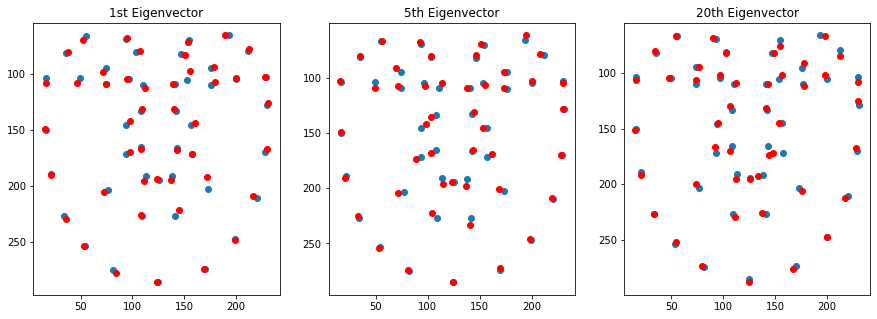

In [25]:
var = eigenvec[1]*25+ mean
var2 = eigenvec[:,1]*25 + mean
var3 = eigenvec[:,20]*25 + mean

# print(test.shape)
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].set_title('1st Eigenvector')
axs[0].scatter(mean[:46], mean[46:])
axs[0].scatter(var[:46], var[46:], color='r')
axs[0].invert_yaxis()

axs[1].set_title('5th Eigenvector')
axs[1].scatter(mean[:46], mean[46:])
axs[1].scatter(var2[:46], var2[46:], color='r')
axs[1].invert_yaxis()

axs[2].set_title('20th Eigenvector')
axs[2].scatter(mean[:46], mean[46:])
axs[2].scatter(var3[:46], var3[46:], color='r')
axs[2].invert_yaxis()


# plt.scatter(test2[:46], test2[46:], color='g')
plt.show()

In [114]:
print(eigval.shape)

(92,)


 # Exaggerated face shapes by varying the main modes of variation beyond the plausible range of variance

(92,)


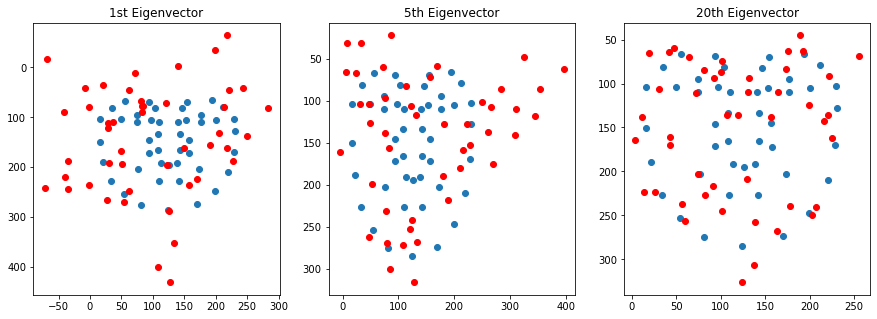

In [115]:
exag = eigenvec[:,1]*eigval[1]*2+ mean
exag2 = eigenvec[:,5]*eigval[2]*2 + mean
exag3 = eigenvec[:,20]*eigval[3]*2 + mean

print(test.shape)
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].set_title('1st Eigenvector')
axs[0].scatter(mean[:46], mean[46:])
axs[0].scatter(exag[:46], exag[46:], color='r')
axs[0].invert_yaxis()

axs[1].set_title('5th Eigenvector')
axs[1].scatter(mean[:46], mean[46:])
axs[1].scatter(exag2[:46], exag2[46:], color='r')
axs[1].invert_yaxis()

axs[2].set_title('20th Eigenvector')
axs[2].scatter(mean[:46], mean[46:])
axs[2].scatter(exag3[:46], exag3[46:], color='r')
axs[2].invert_yaxis()


# plt.scatter(test2[:46], test2[46:], color='g')
plt.show()